##**Assignment-2.1**

In [ ]:
import tensorflow as tf
import numpy as np

**Task 1: Loading the cifar10 data**

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

**Task 2: display random 10 cifar images**

In [ ]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat',
          4:'Deer', 5:'Dog',6:'Frog',
          7:'Horse', 8:'Ship', 9:'Truck'
        }

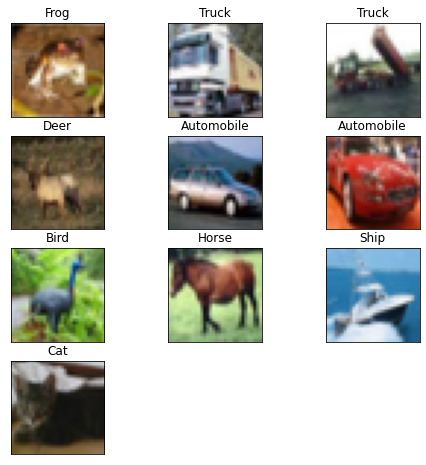

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,10))
for i in range(10):
	plt.subplot(5,3,i+1)
	plt.imshow(x_train[i])
	plt.title(labels[y_train[i][0]])
	plt.xticks([])
	plt.yticks([])
plt.show()

In [ ]:
x_train = x_train/255
x_test = x_test/255

**Task 3 : Build 2 layer Conv2D model**

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                             tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',strides=(1,1)),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2)),

                             tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same',strides=(1,1)),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2)),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Dense(10,activation = 'softmax')
                             
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

**Task 4 : RMSprop optimizer, sparse categorical loss, accuracy**

In [ ]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.6463 - accuracy: 0.4051
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2624 - accuracy: 0.5660
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1198 - accuracy: 0.6242
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0333 - accuracy: 0.6578
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9938 - accuracy: 0.6763
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9826 - accuracy: 0.6787
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9723 - accuracy: 0.6852
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9980 - accuracy: 0.6818
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0023 - accuracy: 0.6832
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.02

**Task 5 : Accuracy Score, Log Loss, Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [ ]:
prob = model.predict(x_test)
pred = np.argmax(prob, axis=1)

In [ ]:
print(accuracy_score(y_test, pred))

0.6453


In [ ]:
print(log_loss(y_test,prob))

1.0724703218806195


In [ ]:
import seaborn as sns

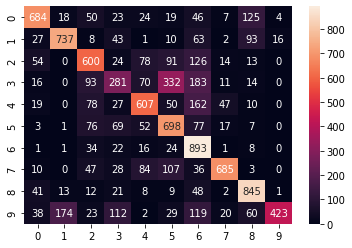

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
plt.show()

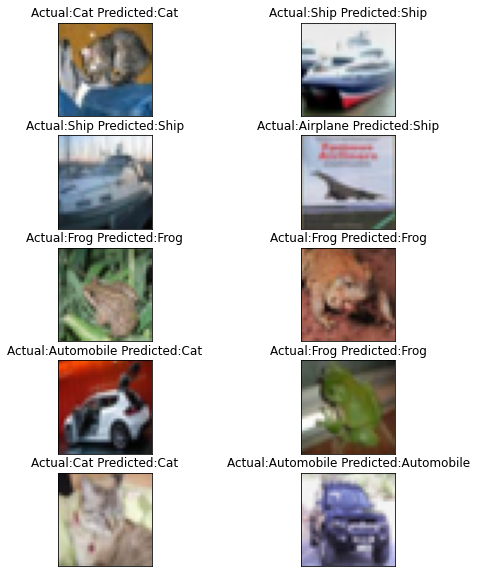

In [ ]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_test[i])
    string = "Actual:"+ labels[y_test[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

##**Assignment-2.2**

In [ ]:
from keras.datasets import cifar100

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169017344/169001437 [==============================] - 13s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
import pandas as pd
'''Fine_labels=['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

category = pd.DataFrame(Fine_labels, columns=['SuperClass'])
category.head()'''
labels = pd.read_csv("/content/cifar100_labels.csv", header=None, index_col=0)
labels.head()

,1
0,
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver


In [ ]:
train_images = train_images/255
test_images = test_images/255

In [ ]:
model2 = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(train_labels)), activation = 'softmax')
                             
])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=2)

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

In [ ]:
history = model2.fit(train_images,train_labels,epochs=50,callbacks=[early_stopping])

Epoch 1/50
1563/1563 [==============================] - 18s 4ms/step - loss: 3.7161 - accuracy: 0.1329
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.9121 - accuracy: 0.2735
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5353 - accuracy: 0.3482
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2520 - accuracy: 0.4088
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0188 - accuracy: 0.4590
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8015 - accuracy: 0.5050
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6030 - accuracy: 0.5524
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4200 - accuracy: 0.5972
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2612 - accuracy: 0.6348
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.11

In [ ]:
prob = model2.predict(test_images)
pred = np.argmax(prob, axis=1)

In [ ]:
print(accuracy_score(test_labels, pred))

0.3302


In [ ]:
test_labels=test_labels.astype('float')
print(log_loss(test_labels, prob))

7.567792248489829


In [ ]:
confusion_matrix(test_labels, pred)

array([[66,  4,  0, ...,  0,  1,  0],
       [ 4, 41,  1, ...,  2,  0,  0],
       [ 1,  1, 23, ...,  4,  2,  0],
       ...,
       [ 0,  1,  1, ..., 27,  0,  3],
       [ 1,  1,  4, ...,  1, 13,  1],
       [ 0,  1,  1, ...,  0,  0, 18]])

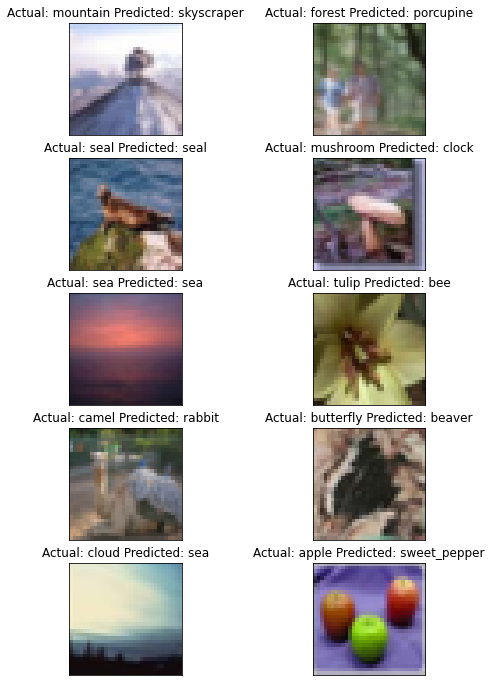

In [ ]:
test_labels = test_labels.astype('int')
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images[i])
    string = "Actual:"+ labels[1][test_labels[i][0]] + " Predicted:" + labels[1][pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
plt.show()